In [35]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import json
import pandas
import jieba
import matplotlib.pyplot as plt

In [36]:
name = []
time = []
category = []
content = []

In [37]:
for n in range(30, 540, 30): #基本爬蟲，因為selenium無法使用，才從開發人員下手
    url = 'https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID={}&len=30'.format(n)
    response = requests.get(url)
    data = json.loads(response.text)
    for i in data['items']:
        title = i['title']
        publishtime = datetime.fromtimestamp(i['publishtime']/1000)
        if len(name)>499:
            break
        name.append(title)
        time.append(publishtime)
        try:
            description = i['description']
            content.append(description)
        except:
            description = ''
            content.append(description)
        try:
            cl = i['bucketgrpids']
            category.append(cl)
        except:
            cl = ['na']
            category.append(cl)
    

In [38]:
df = pandas.DataFrame(list(zip(name, time, category, content)), 
                      columns=['Title', 'Time', 'Class','Description'])

In [39]:
df

,Title,Time,Class,Description
0,「笑得你心裡發寒」的難忘面孔，菲律賓速食界的真正霸主 Jollibee｜南漂作家／生命就該浪...,2020-05-09 09:00:18,[na],【平生不識蜂炸雞，便稱英雄也枉然】#靠炸雞超英趕美？ #買下永和大王添好運\n \n這張似...
1,討厭背單字也能學好語言！自學25語神人說：用小朋友的方式學最快-風傳媒,2020-05-09 09:00:04,[na],二○一二年夏天，三十八位來自美國各地優秀的研究生和大學生，前往厄瓜多東部特納（Tena）附近...
2,準備好你的衛生紙，10部電影看見母愛的無私奉獻，每一部都會讓人想含淚擁抱媽咪-風傳媒,2020-05-09 08:30:01,"[Babyhome_tw, life_tw]",母親節即將來臨，想好要用什麼方式體貼辛苦的母親了嗎？陪媽媽看電影也是一個很好的方式！這十部電...
3,這篇價值1500元 - 專案管理生活思維,2020-05-09 08:00:20,[WhiteCollar_tw],兩週前我很無奈地被警察開了一張1500元的罰單，理由是「後座乘客未繫安全帶」。為什麼會說「無...
4,為什麼人類總害怕跟其他人不一樣？他精闢分析「盲從」是如何影響你我的決策過程-風傳媒,2020-05-09 08:00:01,[na],讓別人認同是一門藝術──說服的藝術。顯然，多數意見擁有巨大的優勢，它幾乎不用試著說服我們。「...
5,當職場上出現這11個不合理的徵兆，別懷疑！遞出辭呈的時候到了-風傳媒,2020-05-09 07:57:47,"[WhiteCollar_tw, business_tw]",「老闆好機車！」、「公司的這項決策有什麼毛病嗎？」、「反正這些機會不會屬於我的……。」工作難...
6,【林富元專欄】兩個月不能出門，痛苦嗎？他道出疫情期間對人生最深刻體悟-風傳媒,2020-05-09 07:30:01,"[Hipster_tw, design_tw]",農曆春節之前武漢封城，全球大家隔岸觀火，也有各種評論。後來火燒到各地自家門口，每個人的看法與...
7,臺青年登亞洲達人秀！「人體大環」優雅自轉看呆3評審…演畢全場歡呼不斷、起立猛鼓掌！-風傳媒,2020-05-09 06:00:09,[na],臺灣藝術家楊世豪日前登上才藝實境秀「亞洲達人秀」，他表演人體大環，結合力與美的演出極為優雅，...
8,專訪剪紙藝術家楊士毅：如果我的藝術只能從痛苦中萃取，那我不要藝術，我要幸福 - The Ne...,2020-05-08 21:27:02,[na],27人稱阿貴的剪紙藝術家楊士毅，每次完成作品後，楊士毅都會問工作夥伴：「你甘嘸夭壽感動？」一...
9,everysize 輸入網址就能測試響應式網頁在各種裝置尺寸的顯示效果,2020-05-09 10:01:56,"[3CExpert_tw, tech_tw]",everysize 內建一些常見的手機、平板電腦顯示器尺寸，例如 iPhone、iPad、S...


In [118]:
#分類統計

In [40]:
cate = [] #尋找category
for n in df.Class:
    for i in n:
        if i not in cate:
            cate.append(i)

In [49]:
len(cate)

17

In [50]:
count_a = 0
count_b = 0
count_c = 0
count_d = 0
count_e = 0
count_f = 0
count_g = 0
count_h = 0
count_i = 0
count_j = 0
count_k = 0
count_l = 0
count_m = 0
count_n = 0
count_o = 0
count_p = 0
count_q = 0

for x in df.Class:
    for n in x:
        if n == cate[0]:
            count_a = count_a + 1
        if n == cate[1]:
            count_b = count_b + 1
        if n == cate[2]:
            count_c = count_c + 1
        if n == cate[3]:
            count_d = count_d + 1
        if n == cate[4]:
            count_e = count_e + 1
        if n == cate[5]:
            count_f = count_f + 1
        if n == cate[6]:
            count_g = count_g + 1
        if n == cate[7]:
            count_h = count_h + 1
        if n == cate[8]:
            count_i = count_i + 1
        if n == cate[9]:
            count_j = count_j + 1
        if n == cate[10]:
            count_k = count_k + 1
        if n == cate[11]:
            count_l = count_l + 1
        if n == cate[12]:
            count_m = count_m + 1
        if n == cate[13]:
            count_n = count_n + 1
        if n == cate[14]:
            count_o = count_o + 1
        if n == cate[15]:
            count_p = count_p + 1
        if n == cate[16]:
            count_q = count_q + 1

statistics = [count_a, count_b, count_c, count_d, count_e, count_f, count_g, count_h, count_i,
              count_j, count_k, count_l, count_m, count_n, count_o,count_p, count_q ]
df_cat = pandas.DataFrame(list(zip(cate, statistics)), columns = ['Class', 'Number'])

In [51]:
df_cat

,Class,Number
0,na,192
1,Babyhome_tw,57
2,life_tw,86
3,WhiteCollar_tw,26
4,business_tw,54
5,Hipster_tw,22
6,design_tw,10
7,3CExpert_tw,52
8,tech_tw,72
9,GamePlayer_tw,28


Text(0, 0.5, 'Number')

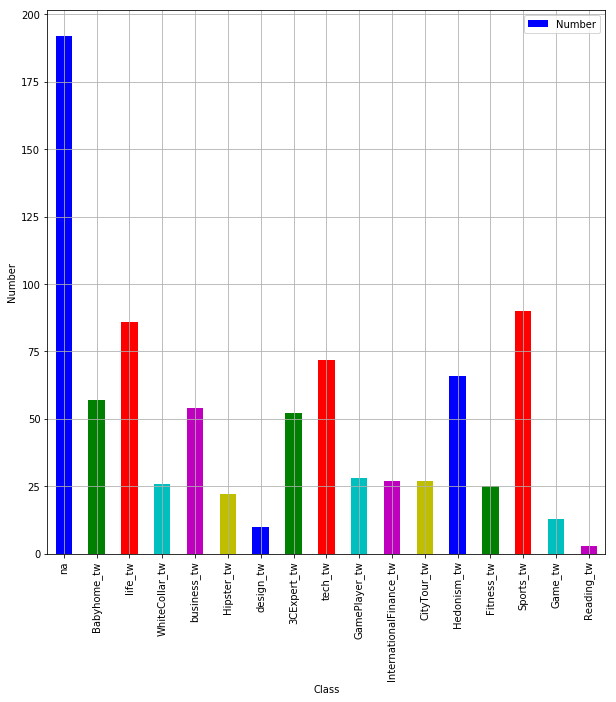

In [52]:
my_colors = ['bgrcmy'] 
df_cat.plot(x = 'Class', kind='bar', figsize=(10,10), color = my_colors, grid=True )
plt.ylabel('Number')

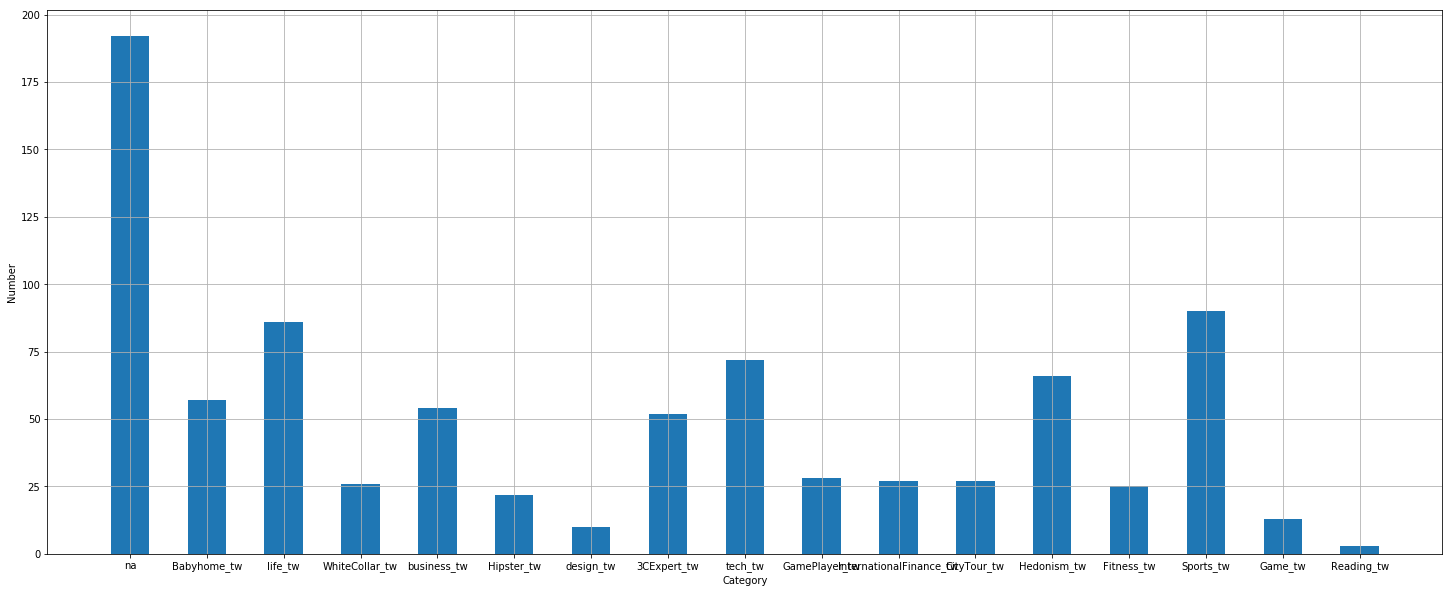

In [53]:
plt.figure(figsize=(25,10))
plt.bar(df_cat.Class, df_cat.Number, .5)
plt.grid(True)
plt.xlabel('Category')
plt.ylabel('Number')
plt.show()

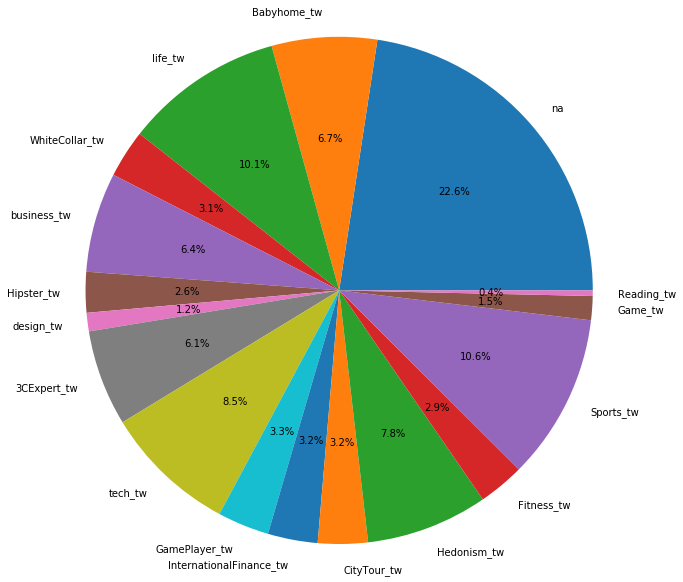

In [54]:
label = df_cat.Class
plt.figure(figsize=(10,10))
plt.pie(df_cat.Number, labels = df_cat.Class, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

In [55]:
seg = []
for n in df.Description:
    element = jieba.lcut(n, cut_all=False)
    seg = seg + element

In [56]:
with open('./停用詞.txt', 'r') as f:
    stop_words=f.readlines()


In [57]:
stop_words_1 = [] #stop words過濾
for n in stop_words:
    x = n.replace('\n','')
    stop_words_1.append(x)

In [58]:
for n in seg:
    if n in stop_words_1:
        seg.remove(n)

In [59]:
seg = []
for n in df.Description:
    element = jieba.analyse.extract_tags(n, topK=20, withWeight = False, allowPOS=())
    seg = seg + element

In [60]:
df_seg = pandas.DataFrame(seg, columns = ['seg'])

In [61]:
df_seg['count'] = 1
df_seg_freq = df_seg.groupby('seg')['count'].sum().sort_values(ascending = False)
df_seg_freq = pandas.DataFrame(df_seg_freq)

In [62]:
df_seg_freq #字數統計

,count
seg,
...,79
我們,45
https,43
美國,41
一個,31
中國,30
因為,29
2020,28
19,27


In [63]:
import jieba.analyse

jieba.analyse.extract_tags(data['items'][0]['description'], topK=20, withWeight=False, allowPOS=())

['每個',
 '持身',
 '現在',
 '情況',
 '這個',
 '賽季',
 '這不像',
 '休賽',
 '季期間',
 '訓練場',
 '館裡面',
 '繼續',
 '訓練',
 '我們',
 '盡力',
 '體狀態',
 '認為',
 '狀態',
 '當我們',
 '回歸時']

In [64]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [65]:
seg = ' '.join(seg)

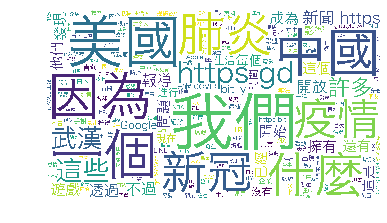

In [66]:
wc = WordCloud(scale = 20, background_color='white',font_path='./Hiragino Sans GB.ttc', width = 1920, height = 1080, margin = 2)
wc.generate(seg)
plt.imshow(wc)
plt.axis("off")
plt.show()